<p>This notebook contains the analysis of the Sharp IR 20-150cm sensor analog-to-digital output readings.
Readings were taken across a series of distances at 10cm intervals between 0 and 170cm where a white piece of paper served as the obstacle. Although the sensors are rated between 20-150cm, distances outside of this range were also tested to discover how the sensors would behave in real world use, where obstacles may appear outside of the rated range. A Regression approach is taken to predict the distance.  </p>

In [26]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [27]:
# read in data for Right IR Sensor
# values in the column headers equate to distance of the obstacle in front of the center in centimetres (cm)
rightIR_df = pd.read_csv("RightIRReadings.csv")
rightIR_df

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,6,533,512,396,309,242,202,172,145,143,116,112,96,95,78,79,38,70
1,23,556,513,395,343,240,197,171,179,175,150,117,101,106,81,96,50,65
2,3,543,506,393,319,240,204,171,148,140,123,108,103,104,82,111,67,67
3,3,523,513,390,288,240,203,172,138,120,127,109,98,92,87,72,71,67
4,6,522,506,394,289,243,231,173,136,128,122,114,95,116,84,83,71,73
5,4,533,518,394,292,243,206,176,132,118,143,104,122,79,80,95,74,85
6,3,525,514,412,302,245,247,180,147,138,124,115,98,86,97,75,64,60
7,3,554,516,393,302,242,205,197,132,128,131,127,107,111,84,64,71,69
8,3,519,516,421,298,243,223,176,147,128,124,119,100,88,87,69,70,63
9,7,520,544,390,299,243,192,176,138,145,127,92,104,72,97,53,80,55


In [28]:
# stats for readings at each distance
rightIR_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.740000,530.400000,516.930000,397.950000,303.170000,246.250000,201.550000,172.53000,150.540000,136.970000,124.970000,111.440000,102.560000,92.480000,83.590000,77.830000,69.840000,66.010000
std,6.780274,11.321741,11.601337,10.903966,9.433505,9.751845,9.356438,7.41205,8.797865,9.083735,9.830333,8.579186,9.608834,13.061997,12.650784,17.143515,16.007397,10.825984
min,0.000000,519.000000,505.000000,384.000000,288.000000,228.000000,184.000000,152.00000,132.000000,114.000000,100.000000,88.000000,72.000000,63.000000,48.000000,37.000000,32.000000,38.000000
25%,3.000000,522.000000,509.500000,390.000000,298.000000,240.000000,197.000000,170.00000,146.000000,134.000000,119.000000,107.000000,98.000000,87.000000,77.750000,69.000000,63.000000,62.750000
50%,3.000000,526.500000,513.000000,394.000000,302.000000,243.000000,200.000000,172.00000,149.000000,136.000000,124.000000,111.500000,101.000000,91.000000,82.000000,75.500000,69.500000,65.500000
75%,6.000000,532.250000,520.000000,401.000000,303.000000,245.250000,203.000000,175.00000,153.250000,141.000000,130.000000,115.250000,104.000000,98.250000,91.250000,83.000000,75.000000,71.000000
max,31.000000,558.000000,557.000000,440.000000,343.000000,279.000000,247.000000,197.00000,182.000000,175.000000,150.000000,135.000000,139.000000,138.000000,127.000000,127.000000,111.000000,95.000000


In [29]:
# average reading at each length
average_readings = rightIR_df.mean(axis=0)
# convert to list and remove 
average_readings = average_readings.tolist()
# list of distances
distances = range(0,180,10)

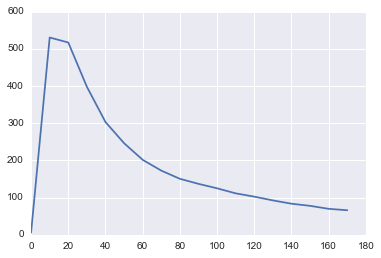

In [30]:
# plot of distances against A2D readings for comparison with manufacturers graph
plt.plot(distances, average_readings)

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]


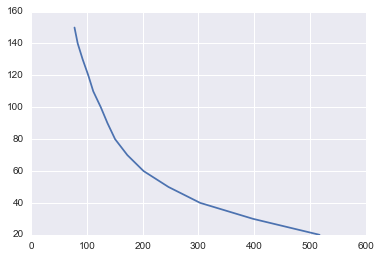

In [31]:
# distance is the unknown variable so we will not plot it on the Y axis and the A2D reading on the X axis
# to calculate a line of best fit the values for distances outside of the range 20-150cm have been excluded
average_readings = average_readings[2:16]
distances = distances[2:16]
print distances
plt.plot(average_readings, distances)

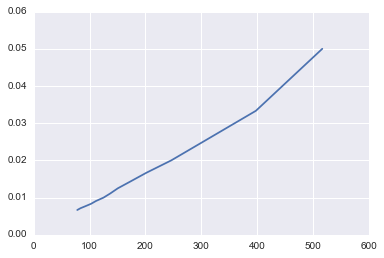

In [32]:
# This relationship is not linear 
# 1/distance plotted against A2D readings
inversed_distances = [pow(distance,-1) for distance in distances]
inversed_distances
plt.plot(average_readings, inversed_distances)

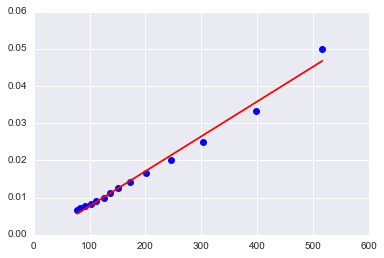

In [33]:
p1 = np.polyfit(average_readings, inversed_distances, 1)
plt.plot(average_readings,inversed_distances,'bo')
plt.plot(average_readings,np.polyval(p1,average_readings),'r')
slope,intercept,r_value,p_value,std_err = stats.linregress(average_readings,inversed_distances)


In [34]:
print "R value: ",r_value
print "Slope: ", slope
print "Intercept: ", intercept
print "P value: ", p_value
p1

R value:  0.993931060511
Slope:  9.35018208612e-05
Intercept:  -0.00159900794012
P value:  7.12056008594e-13


array([  9.35018209e-05,  -1.59900794e-03])

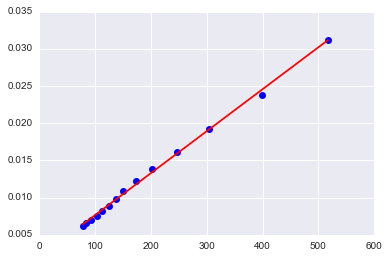

In [35]:
inversed_distances = [pow(distance+12,-1) for distance in distances]
p1 = np.polyfit(average_readings, inversed_distances, 1)
plt.plot(average_readings,inversed_distances,'bo')
plt.plot(average_readings,np.polyval(p1,average_readings),'r')
slope,intercept,r_value,p_value,std_err = stats.linregress(average_readings,inversed_distances)




In [36]:
print "R value: ",r_value
print "Slope: ", slope
print "Intercept: ", intercept
print "P value: ", p_value
p1


R value:  0.999095929196
Slope:  5.63710645179e-05
Intercept:  0.00202946559052
P value:  7.86801463234e-18


array([  5.63710645e-05,   2.02946559e-03])

In [53]:
# equation for line of best fit for righty IR:
# 1/(distance + k) = 0.00005663710645179x + 0.00202946559052
# new formula: 1/(distance + k) = 0.0000563710645179x + 0.00202946559052
# distance = (1/(0.0000563710645179x + 0.00202946559052 )) - 12

In [54]:
(1/(0.0000563710645179 * 77 + 0.00202946559052 )) - 12

144.98494566670072

In [39]:
# callibration of Left Sharp IR sensor

In [50]:
leftIR_df = pd.read_csv("LeftIRReadings.csv")
leftIR_df

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,3,523,512,385,321,238,192,152,149,157,108,100,89,77,72,61,47,35
1,3,549,537,392,298,231,198,168,165,126,108,101,93,81,95,63,63,16
2,3,543,512,385,288,241,195,160,173,130,109,107,88,80,69,55,22,40
3,0,523,537,392,297,239,202,162,152,124,96,96,95,86,74,79,43,36
4,3,536,508,394,297,244,195,182,150,143,109,111,89,85,78,63,41,31
5,5,516,536,401,298,237,209,173,144,126,108,101,91,84,48,48,40,36
6,23,538,514,390,284,243,194,154,159,128,109,105,111,82,78,61,40,49
7,2,518,568,397,294,239,199,160,141,125,110,127,93,82,68,55,42,33
8,4,543,540,387,301,239,196,164,146,127,111,100,91,81,91,63,36,40
9,3,522,538,395,297,255,203,162,145,124,109,82,88,80,72,59,45,37


In [41]:
distances = range(0,160,10)
average_readings2 = leftIR_df.mean(axis=0)
# convert from series to a list
average_readings2 = average_readings2[:-2].tolist()
average_readings2

[4.6299999999999999,
 524.36000000000001,
 521.61000000000001,
 396.58999999999997,
 297.80000000000001,
 238.16,
 196.63999999999999,
 167.52000000000001,
 145.43000000000001,
 127.44,
 111.26000000000001,
 101.62,
 89.659999999999997,
 82.730000000000004,
 74.590000000000003,
 58.960000000000001]

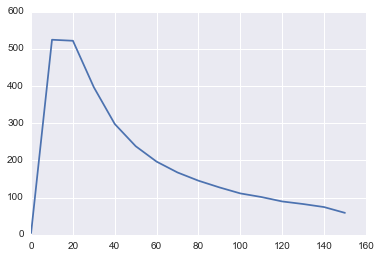

In [42]:
# A2D vs distance graph for comparison with manufacturers
plt.plot(distances, average_readings2)

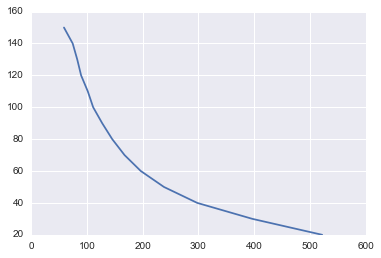

In [43]:
# plot of dependent variable distance against independent variable A2D, exludes distances out of sensor's rated
distances = range(20,160,10)
average_readings2 = average_readings2[2:]
plt.plot(average_readings2, distances)

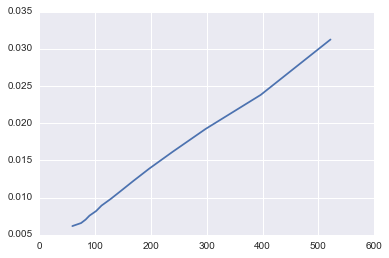

In [44]:
inversed_distances2 = [pow(distance,-1) for distance in distances]
plt.plot(average_readings2, inversed_distances)

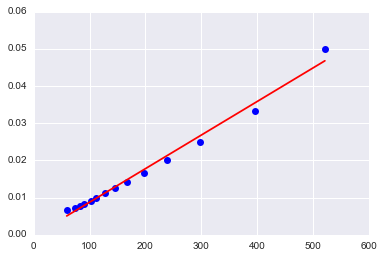

In [45]:
p2 = np.polyfit(average_readings2, inversed_distances2, 1)
plt.plot(average_readings2,inversed_distances2,'bo')
plt.plot(average_readings2,np.polyval(p2,average_readings2),'r')
slope,intercept,r_value,p_value,std_err = stats.linregress(average_readings2,inversed_distances2)

In [46]:
print "R value: ",r_value
print "Slope: ", slope
print "Intercept: ", intercept
print "P value: ", p_value
p2


R value:  0.993913122547
Slope:  9.01506542482e-05
Intercept:  -0.0002479435551
P value:  7.24749504672e-13


array([  9.01506542e-05,  -2.47943555e-04])

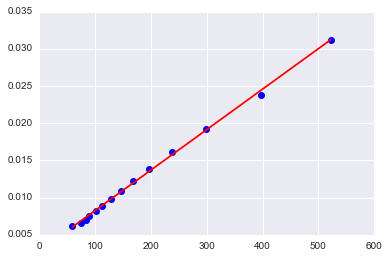

In [47]:
# correction constant k to get a closer fit to the line
inversed_distances2 = [pow(distance+12,-1) for distance in distances]
p2 = np.polyfit(average_readings2, inversed_distances2, 1)
plt.plot(average_readings2,inversed_distances2,'bo')
plt.plot(average_readings2,np.polyval(p2,average_readings2),'r')
slope,intercept,r_value,p_value,std_err = stats.linregress(average_readings2,inversed_distances2)


In [48]:
print "R value: ",r_value
print "Slope: ", slope
print "Intercept: ", intercept
print "P value: ", p_value
p2

R value:  0.999315305869
Slope:  5.43636037657e-05
Intercept:  0.00284159744082
P value:  1.48536896077e-18


array([  5.43636038e-05,   2.84159744e-03])

In [56]:
# equation of line of best fit for left sensor:
# distance = (1/(0.0000549650376444x + 0.00281529488988 )) - 12
# new formula: distance = (1/(0.0000543636037657x + 0.00284159744082)) - 12

(1/(0.0000549650376444 * 61 + 0.00281529488988 )) - 12

150.12284466825076